In [1]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_data.csv')


Populating the interactive namespace from numpy and matplotlib


Plotting Crimes by Date. We see that 05/31 (BLM protests) had the highest crimes, followed by 2019/01/01.

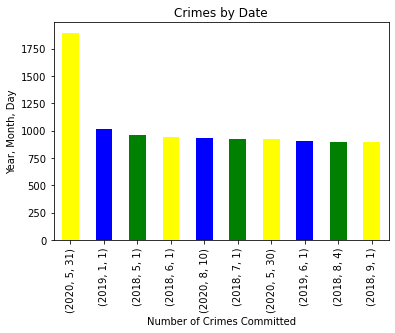

In [3]:
df.index = pd.DatetimeIndex(df.Date)
df.groupby([df.index.year, df.index.month, df.index.day]).size().sort_values(ascending=False)[:10].plot(kind='bar',color=['yellow','blue','green'])
plt.ylabel('Year, Month, Day')
plt.xlabel('Number of Crimes Committed')
plt.title('Crimes by Date')
plt.show()

The most crime infested hour is 12am-1am on New Years Day.

*Add Month wise trend line - Allie*

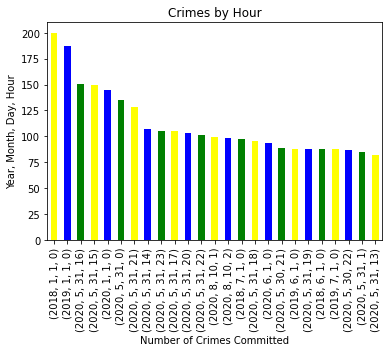

In [26]:
df.index = pd.DatetimeIndex(df.Date)
df.groupby([df.index.year, df.index.month, df.index.day, df.index.hour]).size().sort_values(ascending=False)[:25].plot(kind='bar',color=['yellow','blue','green'])
plt.ylabel('Year, Month, Day, Hour')
plt.xlabel('Number of Crimes Committed')
plt.title('Crimes by Hour')
plt.show()

Most frequent crime types are THEFT, BATTERY, CRIMINAL DAMAGE, ASSAULT, DECEPTIVE PRACTICE

Correlation Matrix

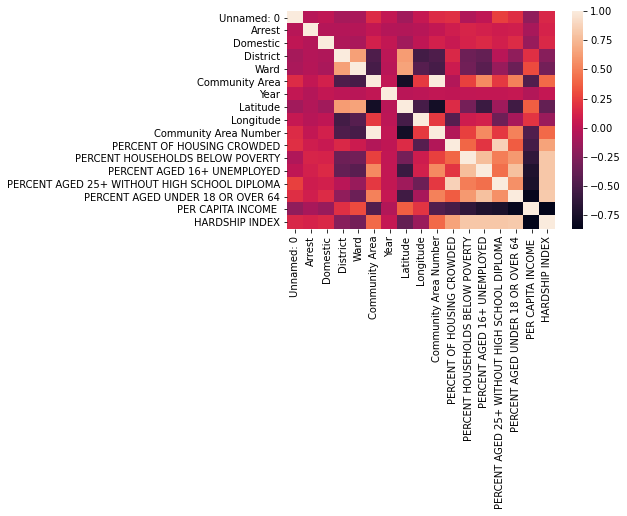

In [7]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

Correlation Plots

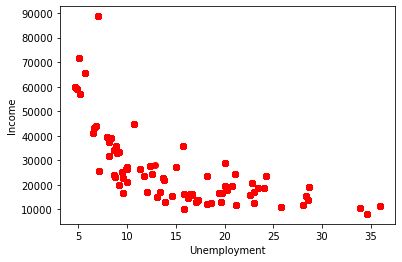

In [10]:
plot( df['PERCENT AGED 16+ UNEMPLOYED'], df['PER CAPITA INCOME '], marker='o', color='red', linestyle='None')

ylabel('Income')
xlabel('Unemployment')
show()

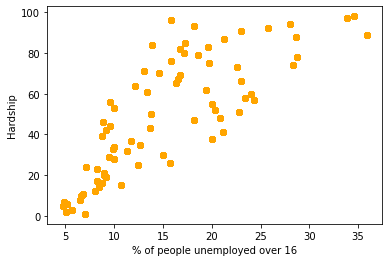

In [15]:
# the more people unemployed, the more hardship

plot( df['PERCENT AGED 16+ UNEMPLOYED'], df['HARDSHIP INDEX'], marker='o', color='orange', linestyle='None')
ylabel('Hardship')
xlabel('% of people unemployed over 16')
show()

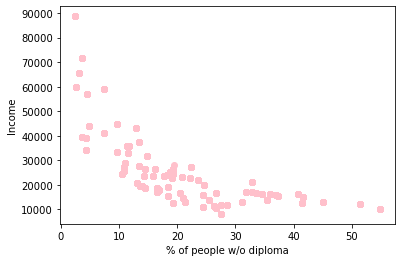

In [16]:
plot( df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'], df['PER CAPITA INCOME '], marker='o', color='pink', linestyle='None')
ylabel('Income')
xlabel('% of people w/o diploma')
show()

**Problem Statement**

When and where in Chicago are you most likely to be a victim of crime?  And what steps can be taken by you and the goverment to be safe? 

Crime by Location *(also add Map and Crimes by Location & Type - Stacked) - Yash / Ari*

<AxesSubplot:xlabel='count', ylabel='Location Description'>

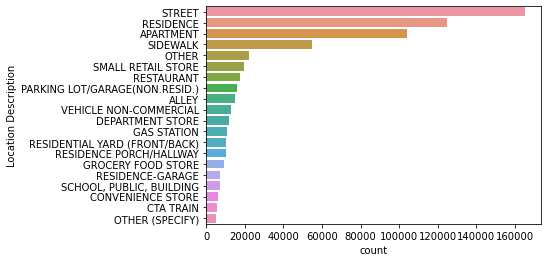

In [17]:
#Crimes by Location (Chose top 19 because 20th entry is Other which provides no additional insights)
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:20].index)

Text(0.5, 1.0, '% of Arrests')

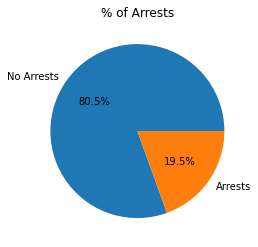

In [25]:
arrests = df['Arrest'].value_counts()
arrests_as_percent = (arrests / df['Arrest'].sum()) * 100 
labels='No Arrests','Arrests'
plt.pie(x=arrests_as_percent,autopct='%1.1f%%',labels=labels)
plt.title("% of Arrests")

In [35]:
df_ny = df[(df.index.day == 1)&(df.index.month == 1)&(df.index.hour == 0)]
df_ny2 = df[(df.index.day == 1)&(df.index.month == 1)]
df_blm = df[(df.index.day == 31)&(df.index.month == 5)&(df.index.year == 2020)]

<AxesSubplot:>

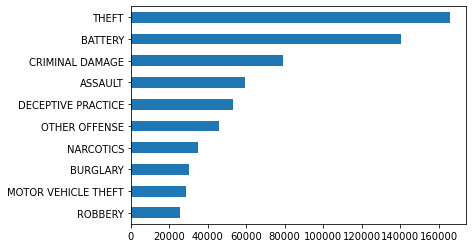

In [9]:
df['Primary Type'].value_counts().sort_values(ascending=True)[-10:].plot(kind='barh')

<AxesSubplot:>

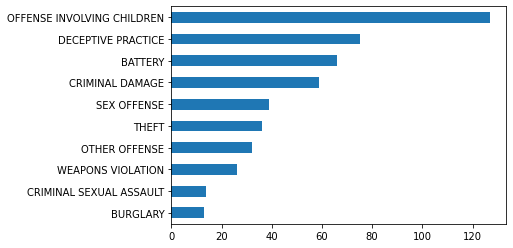

In [37]:
df_ny['Primary Type'].value_counts().sort_values(ascending=True)[-10:].plot(kind='barh')

<AxesSubplot:>

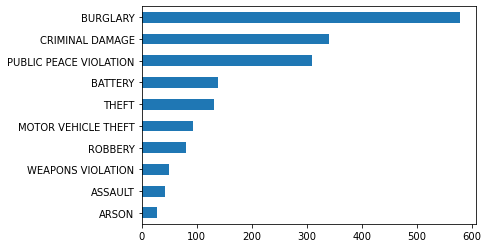

In [34]:
df_blm['Primary Type'].value_counts().sort_values(ascending=True)[-10:].plot(kind='barh')

General, NY, and BLM, show very different distributions. The high number of offenses involving children is due to underage drinking and sale of tobacco products, etc. 

*Create Map for comparison - Ari*

<AxesSubplot:xlabel='count', ylabel='Location Description'>

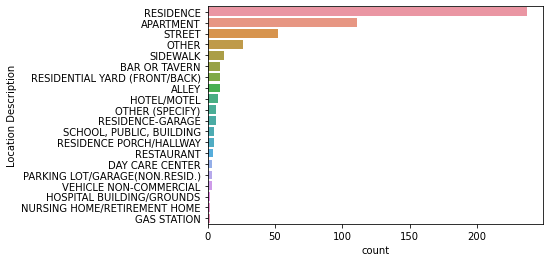

In [41]:
sns.countplot(y= 'Location Description', data = df_ny, order = df_ny['Location Description'].value_counts().iloc[:20].index)

Crime vs Income *Sorting fix - Serena*

<AxesSubplot:>

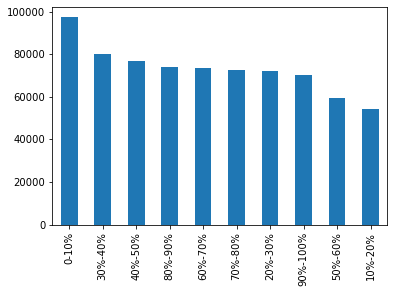

In [42]:
# Crime vs. Income (10% each bin)
df['income_ratio'] = pd.qcut(df['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])
df['income_ratio'].value_counts().plot(kind='bar')

<ipython-input-43-fd076d971fb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['income_ratio'] = pd.qcut(df_ny['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])


<AxesSubplot:>

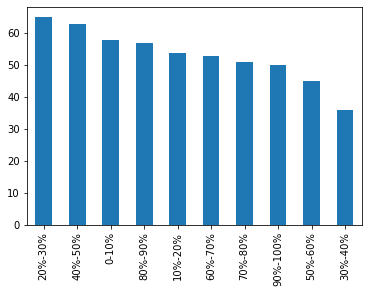

In [43]:
df_ny['income_ratio'] = pd.qcut(df_ny['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])
df_ny['income_ratio'].value_counts().plot(kind='bar')

<ipython-input-44-1cfc8357ce6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blm['income_ratio'] = pd.qcut(df_blm['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])


<AxesSubplot:>

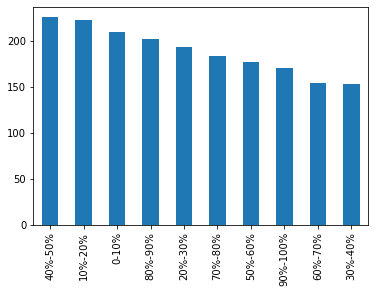

In [44]:
df_blm['income_ratio'] = pd.qcut(df_blm['PER CAPITA INCOME '], 10, ['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%'])
df_blm['income_ratio'].value_counts().plot(kind='bar')

In [51]:
df.pivot_table(index='income_ratio', columns='Primary Type', values='Date', aggfunc='count')

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
income_ratio,,,,,,,,,,,,,,,,,,,,,
0-10%,238,8650,22175,2936,134,307,10230,247,2116,3435,...,6233,735,3,809,0,4005,368,78,12128,4810
10%-20%,165,5116,12075,2308,26,150,6400,138,1023,2423,...,3719,27,1,315,1,2298,264,36,8701,2159
20%-30%,151,6363,15504,2710,44,217,8045,156,1517,3547,...,5157,74,1,447,0,2444,291,46,11366,2707
30%-40%,206,7218,17902,3294,32,274,9204,244,1673,4180,...,5559,455,4,495,0,3289,354,47,12980,2934
40%-50%,155,7347,16872,3402,60,258,9760,170,1854,3857,...,5664,135,5,380,0,2713,273,74,13114,3052
50%-60%,95,5217,12386,3191,21,191,7554,162,1453,3830,...,4386,25,1,255,0,1952,261,57,11561,1515
60%-70%,116,5933,13745,3317,146,216,8828,184,1920,6532,...,5263,192,4,391,0,2053,392,74,16824,1158
70%-80%,80,5264,12035,3547,17,281,7950,230,1936,7494,...,4590,7,4,312,0,2061,394,75,20456,795
80%-90%,78,4698,9922,3406,20,269,6963,206,2199,7992,...,3475,19,6,306,0,2488,356,72,26131,570


In [52]:
df_ny.pivot_table(index='income_ratio', columns='Primary Type', values='Date', aggfunc='count')

Primary Type,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
income_ratio,,,,,,,,,,,,,,,,,
0-10%,0,6,3,1,10,2,0,4,0,1,15,2,0,0,7,1,6
10%-20%,1,9,0,0,4,1,0,5,1,0,15,4,0,0,3,4,7
20%-30%,2,4,3,1,9,0,0,6,0,1,22,0,1,0,10,2,4
30%-40%,1,2,0,2,5,2,0,4,1,0,11,1,0,0,2,3,2
40%-50%,0,6,1,1,6,1,2,9,3,1,18,5,0,0,6,1,3
50%-60%,0,4,1,4,8,1,0,3,2,0,8,1,0,2,3,6,2
60%-70%,2,9,0,1,5,2,0,8,2,0,13,4,0,0,2,4,1
70%-80%,0,5,1,0,3,3,0,11,2,0,12,8,1,2,3,0,0
80%-90%,1,6,2,1,6,2,0,17,0,0,10,4,0,0,3,4,1


In [53]:
df_blm.pivot_table(index='income_ratio', columns='Primary Type', values='Date', aggfunc='count')

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
income_ratio,,,,,,,,,,,,,,,,,,,,
0-10%,5,14,16,15,0,43,0,0,1,4,1,10,1,1,4,66,8,1,16,4
10%-20%,5,4,19,26,0,37,0,2,2,4,0,18,0,0,0,80,6,0,12,8
20%-30%,1,5,13,76,0,36,3,1,3,5,0,11,0,1,0,17,11,0,8,3
30%-40%,6,4,18,29,0,24,1,1,0,2,0,8,0,0,1,38,10,0,7,4
40%-50%,3,7,21,86,1,35,0,1,0,3,0,7,1,1,3,18,13,0,17,9
50%-60%,4,1,10,77,0,28,0,3,5,0,0,6,0,0,2,15,8,0,15,3
60%-70%,4,3,10,42,0,27,0,0,1,1,0,12,0,1,1,31,6,0,14,1
70%-80%,0,4,12,69,0,32,0,4,3,0,1,9,3,1,2,20,6,1,13,4
80%-90%,0,1,15,85,0,29,0,5,4,0,0,6,0,1,5,19,11,0,17,4


In [55]:

test_df = df.groupby(by='Community Area', as_index=False)[['Date']].agg('count')
income = pd.read_csv('Per_Capita_Income.csv')
my_df = test_df.merge(income, left_index=True, right_on='Community Area Number')
my_df.drop(columns='Community Area Number', inplace=True)
my_df.rename(columns={'Date':'Crime'}, inplace=True)
my_df.rename(columns={'PERCENT OF HOUSING CROWDED':'housing_crowded'}, inplace=True)
my_df.rename(columns={'PERCENT HOUSEHOLDS BELOW POVERTY':'below_poverty'}, inplace=True)
my_df.rename(columns={'PERCENT AGED 16+ UNEMPLOYED':'unemployed'}, inplace=True)
my_df.rename(columns={'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA':'no_diploma'}, inplace=True)
my_df.rename(columns={'PERCENT AGED UNDER 18 OR OVER 64':'old_young'}, inplace=True)
my_df.rename(columns={'PER CAPITA INCOME ':'income'}, inplace=True)
my_df.rename(columns={'HARDSHIP INDEX':'hardship'}, inplace=True)
my_df.set_index('COMMUNITY AREA NAME')
my_df

,Community Area,Crime,COMMUNITY AREA NAME,housing_crowded,below_poverty,unemployed,no_diploma,old_young,income,hardship
0,1,10961,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2,9970,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3,9755,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4,5516,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5,3667,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...,...
72,73,8985,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,74,1526,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75,5640,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76,4367,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0


In [61]:
df

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,...,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,income_ratio
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-17 21:30:00+00:00,0,2020-03-17 21:30:00+00:00,039XX N LECLAIRE AVE,THEFT,$500 AND UNDER,STREET,False,False,16,45,...,15,Portage Park,4.1,11.6,12.6,19.3,34.0,24336,35.0,60%-70%
2019-10-13 06:00:00+00:00,1,2019-10-13 06:00:00+00:00,048XX W WAVELAND AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET S...,RESIDENCE,False,True,16,30,...,15,Portage Park,4.1,11.6,12.6,19.3,34.0,24336,35.0,60%-70%
2019-10-13 15:57:00+00:00,2,2019-10-13 15:57:00+00:00,036XX N AUSTIN AVE,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,16,36,...,15,Portage Park,4.1,11.6,12.6,19.3,34.0,24336,35.0,60%-70%
2019-10-13 10:50:00+00:00,3,2019-10-13 10:50:00+00:00,041XX N MANGO AVE,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,False,False,16,38,...,15,Portage Park,4.1,11.6,12.6,19.3,34.0,24336,35.0,60%-70%
2019-10-13 10:15:00+00:00,4,2019-10-13 10:15:00+00:00,053XX W NEWPORT AVE,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,16,30,...,15,Portage Park,4.1,11.6,12.6,19.3,34.0,24336,35.0,60%-70%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-04 13:00:00+00:00,730527,2019-05-04 13:00:00+00:00,134XX S HOUSTON AVE,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,4,10,...,55,Hegewisch,3.3,17.1,9.6,19.2,42.9,22677,44.0,50%-60%
2018-08-15 11:00:00+00:00,730528,2018-08-15 11:00:00+00:00,030XX E 130TH ST,ASSAULT,SIMPLE,LIBRARY,False,False,4,10,...,55,Hegewisch,3.3,17.1,9.6,19.2,42.9,22677,44.0,50%-60%
2018-08-18 15:00:00+00:00,730529,2018-08-18 15:00:00+00:00,131XX S AVENUE N,BATTERY,SIMPLE,STREET,False,False,4,10,...,55,Hegewisch,3.3,17.1,9.6,19.2,42.9,22677,44.0,50%-60%


In [60]:
# import statsmodels.api as sm
# from patsy import dmatrices
# y, X = dmatrices('Crime ~ housing_crowded + below_poverty + unemployed + no_diploma + old_young + income + hardship', data=df, return_type='dataframe')
# model = sm.OLS(y, X)       # Set up the model
# result = model.fit()       # Fit model (find the intercept and slopes)
# print(result.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

*Build Tree and Classifier Models to review - Ari* 

*Build Dummy test set for prediction and solutions*